In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, '' )

'en_US.UTF-8'

In [2]:
data = pd.read_csv('compras.csv')

In [3]:
data.rename(columns={
    'Institución': 'office',
    'Tipo/Código del proceso': 'type', 
    'Nombre del proceso': 'title',
    'Resultado': 'status', 
    'Monto': 'amount',
    'Fecha Resultado': 'date'
}, inplace=True)

In [4]:
def type_and_code(type_label):
    LG = 'Libre gestión'
    LC = 'Licitación/Concurso'
    CD = 'Contratación directa'
    if type_label.find(LG) == 0:
        return type_label[0:len(LG)], type_label[len(LG) + 1:]
    if type_label.find(LC) == 0:
        return type_label[0:len(LC)], type_label[len(LC) + 1:]
    if type_label.find(CD) == 0:
        return type_label[0:len(CD)], type_label[len(CD) + 1:]
    return 'N/C', type_label

def set_status(status_label):
    if status_label == 'Adjudicado':
        return 'Adjudicada'
    if status_label == 'Declarada Desierta':
        return 'Desierta'
    return status_label

def adjust_office_name(name):
    if name.find('Hospital Nacional "Monseñor Oscar Arnulfo Romero y Galdámez') == 0:
        return 'Hosp. Cdad. Barrios'
    if name.find('Seguridad Pública') >= 0:
        return 'Min. Seguridad Pública'
    if name.find('Defensa') >= 0:
        return 'Min. Defensa'
    if name.find('MINSAL') >= 0:
        return 'MINSAL'
    if name.find('Bienestar Magisterial') >= 0:
        return 'Bienestar Magisterial'
    if name.find('Municipalidad') >= 0:
        return name.replace('Municipalidad', 'Mun.')
    if name.find('Ministerio') >= 0:
        return name.replace('Ministerio', 'Min.')
    return name

In [5]:
data['type'] = data['type'].fillna('N/C')
data['status'] = data['status'].fillna('N/C')
data['office'] = data['office'].fillna('N/C')
data['reference'] = data['type'].apply(lambda s: type_and_code(s)[1])
data['category'] = data['type'].apply(lambda s: type_and_code(s)[0])
data['status'] = data['status'].apply(set_status)
data['amount'] = data['amount'].apply(lambda s: float(str(s).replace('$', '').replace(',', '')))
data['office'] = data['office'].apply(adjust_office_name)

In [6]:
data = data[data['category'] != 'N/C']
data = data[data['status'] == 'Adjudicada']

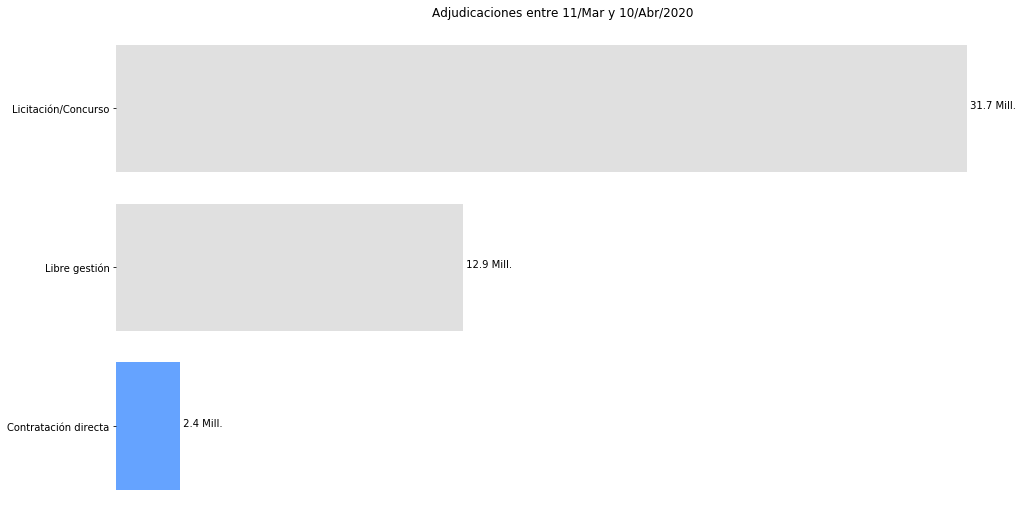

In [7]:
def plot_by_category(data):
    by_category = data.groupby('category')['amount']
    cat_sum = by_category.sum()  / 1e6
    back_color = '#CCCCCC'
    front_color = '#0066ff'

    fig, ax = plt.subplots(figsize=(16, 9))

    ax.barh(
        cat_sum.index, 
        cat_sum.values, 
        color=[front_color, back_color, back_color],
        alpha=0.6
    )
    for i, val in enumerate(cat_sum.values):
        ax.text(val, i, ' %.1f Mill.' % val)

    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.title('Adjudicaciones entre 11/Mar y 10/Abr/2020')
    fig.savefig('adjudicaciones.jpg')
    
plot_by_category(data)

In [8]:
direct = data[data['category'] ==  'Contratación directa']

In [9]:
by_office = direct.groupby('office')['amount'].sum().sort_values()
by_office = by_office[by_office > 0]

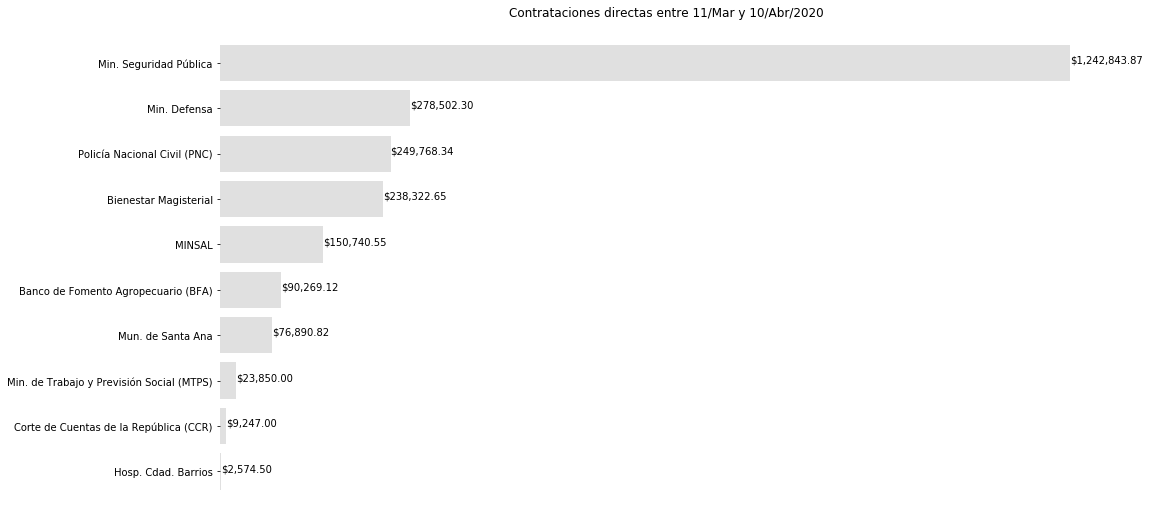

In [13]:
back_color = '#CCCCCC'
alt_color = '#FF6600'
front_color = '#0066FF'

fig, ax = plt.subplots(figsize=(16, 9))

ax.barh(
    by_office.index, 
    by_office.values,
    alpha=0.6,
    color=back_color,
)
for i, val in enumerate(by_office.values):
    ax.text(val, i, locale.currency(val, grouping=True ))

ax.set_frame_on(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Contrataciones directas entre 11/Mar y 10/Abr/2020')
fig.savefig('directas.jpg')

In [12]:
direct.to_csv('directas.csv', index=False)
direct.to_excel('directas.xlsx', index=False)
direct

,office,type,title,status,amount,date,reference,category
183,Corte de Cuentas de la República (CCR),Contratación directa CD-02/2020,ADQUISICIÓN DE MATERIAL E INSTRUMENTAL DE LABO...,Adjudicada,9247.00,22/04/2020,CD-02/2020,Contratación directa
185,Mun. de Santa Ana,Contratación directa CD-04-COVID-19-2020,COMPRA DE CABINAS DE DESINTOXICACIÓN E INSUMOS...,Adjudicada,45487.02,22/04/2020,CD-04-COVID-19-2020,Contratación directa
258,Policía Nacional Civil (PNC),Contratación directa CD-08/2020-PNC,"¿SUMINISTRO DE MATERIALES Y EQUIPO MÉDICO, PAR...",Adjudicada,249768.34,21/04/2020,CD-08/2020-PNC,Contratación directa
473,Min. de Trabajo y Previsión Social (MTPS),Contratación directa CD02-2020,CONTRATACION DE SERVICIOS JURIDICOS,Adjudicada,15600.00,16/04/2020,CD02-2020,Contratación directa
659,Bienestar Magisterial,Contratación directa CD-006/2020-ISBM,SUMINISTRO DE MEDICAMENTOS PARA LA ATENCIÓN DE...,Adjudicada,159951.70,14/04/2020,CD-006/2020-ISBM,Contratación directa
660,Bienestar Magisterial,Contratación directa CD-007/2020-ISBM,"CONTRATACIÓN DIRECTA Nro. 007/2020-ISBM ""ADQUI...",Adjudicada,40250.95,14/04/2020,CD-007/2020-ISBM,Contratación directa
694,Banco de Fomento Agropecuario (BFA),Contratación directa CD 02-2020,RENOVACIÓN DE LICENCIAMIENTO Y SOPORTE DE SPEC...,Adjudicada,90269.12,13/04/2020,CD 02-2020,Contratación directa
695,Mun. de Santa Ana,Contratación directa CD-02-COVID-19-2020,CONTRATACIÓN DE SERVICIOS DE MANTENIMIENTO COR...,Adjudicada,12000.00,13/04/2020,CD-02-COVID-19-2020,Contratación directa
774,MINSAL,Contratación directa CDCU 06-2020 FOPROMID-MINSAL,SUMINISTRO E INSTALACION DE SISTEMA DE ILUMINA...,Adjudicada,150740.55,06/04/2020,CDCU 06-2020 FOPROMID-MINSAL,Contratación directa
775,Hosp. Cdad. Barrios,Contratación directa CD-01/2020,¿ADQUISICIÓN DE INSUMOS MÉDICOS PARA LA PREVEN...,Adjudicada,2574.50,06/04/2020,CD-01/2020,Contratación directa
